## Context and goals:
Brazil has 24.000 dams. The government is making a effort to control and label the dams according to low, medium and high risk, but there are two big problems: 1. the risk criteria demands several features that are hard to collect and measure; 2. the governemnt does not have enough regulatory institutions and qualified workers to visit all of them, collect information and label the risk manually.  
Therefore, this project goal will be pre-label as many dams as possible, so the government can focus on prioritize the inspection on the higher risk ones. 

## To dos:

1. Drop useless columns (ok)
2. Count nulls (ok)
3. Text cleaning (ok)
4. Fill remaining nulls w/ averages (consider average per the subgroup)

1. prepare categorical data (one-hot- enconding)
2. organize numerical data (standard scaler)
3. study the 'less features' thing

1. to go further: there are only 10 accidents in BR (I can't find the number of incidents). Is it possible to predict the probabilities for the next one with the poor dataset that I have?


## Libraries and Dataframe

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', 100)
df = pd.read_excel('SNISB 2018.xlsx', sheet_name='Cadastro')

In [3]:
#df.isnull().sum().sort_values()

## drop columns
not necesseary features to execute machine learning
(but necessary for statiscal graphs, specially to show the precarious control situation)

In [4]:
#deleted because this is register info
df.drop(columns=['Codigo_barragem_Fiscalizador', 'Autorizacao_Numero',
                 'CNARH_Numero', 'Barragem_NomeSecundario', 'Empreendedor_Nome',
                 'Empreendedor_Sigla', 'Empreendedor_CNPJ',
       'Empreendedor_CPF', 'Empreendedor_endereco', 'Empreendedor _e-mail',
       'Empreendedor_telefone', 'Empreendedor_telefone alternativo',             
                 'Cursodagua_barrado', 'Bacia_Hidrografica', 'UnidadeGestaoRecursosHidricos',
                 'Datum', 'Empreendedor Identificado?'], inplace=True)

In [5]:
#deleted because this is unnecessary info for machine learning
df.drop(columns=['Codigo_barragem_SNISB','Autorizacao_Data_emissao_publicacao',
           'Autorizacao_Data_validade','Uso_Complementar','Regiao_Hidrografica_CNRH','Latitude_dec',
           'Longitude_dec','Dominio_Curso_Dagua','DataUltimaInspecao','TipoUltimaInspecao',
           'ComentariosObservacoes','Órgão fiscalizador','Barragem Pública ou particular','Barragem Outorgada?',
           'Tem informação de altura?','Tem informação de volume?','Tem informação de altura e volume?',
           'classificada quanto ao CRI?','classificada quanto ao DPA?','Houve alguma inspeção no período deste RSB?',
           'Cadastrada no SNISB?','N','sequência'], inplace=True)

In [6]:
#deleted because there are too many nulls when filtering by risk criteria
df.drop(columns=['Construcao_Data_Inicio', 'Barragem_Altura_AcimaBaseFundacao','Classe Residuo', 'Barragem_nivel_de_perigo',
                 'Barragem_Classe', 'DataUltimaFiscalização', 'Barragem_Principal_Tipo_estrutural','VazaoProjeto_OrgaoExtravasor',
                 'CriterioVazaoProjeto_OrgaoExtravasor','ExtravasorControle','Barragem_autuada?', 'Construcao_Data_Fim',
                 'CRI - ∑ pontuação CT','CRI - ∑ pontuação EC', 'CRI - ∑ pontuação PSB','CRI - pontuação Confiabialidade das estruturas extravasoras',
                 'CRI - pontuação Confiabialidade das estruturas de adução','CRI - pontuação Percolação', 
                 'CRI - pontuação Deformações e recalques','CRI - pontuação Deterioração taludes', 'CRI - pontuação  Eclusa'],inplace = True)


## Dtype organization

In [7]:
# ISSUE !!!! FORM SUBMITTED.
# I only want (and really need) the years,but this series is a mess. I don't know how to loop that.

#df['Construcao_Data_Fim'].unique()

In [8]:
df["Barragem_Altura_AcimaNivelTerreno"] = pd.to_numeric(df["Barragem_Altura_AcimaNivelTerreno"], errors='coerce')

In [9]:
df["Barragem_Capacidade"] = pd.to_numeric(df["Barragem_Capacidade"], errors='coerce')

In [10]:
#df.dtypes

## Text cleaning 

In [11]:
df['Barragem_Principal_Tipo_material'] = df['Barragem_Principal_Tipo_material'].str.lower()
df['Barragem_Principal_Tipo_material'] = df['Barragem_Principal_Tipo_material'].replace('terra ','terra')
df['Barragem_Principal_Tipo_material'] = df['Barragem_Principal_Tipo_material'].replace('alvenaria ','alvenaria')
df['Barragem_Principal_Tipo_material'] = df['Barragem_Principal_Tipo_material'].replace('sem informação', np.nan)
df['Barragem_Principal_Tipo_material'].value_counts()
df['Barragem_Principal_Tipo_material'].isnull().sum() #10735 nulls

10735

In [12]:
df['Uso_principal'] = df['Uso_principal'].str.lower()
df['Uso_principal'].value_counts()
df['Uso_principal'].isnull().sum() #0 nulls

0

In [13]:
df['Barragem_UF'] = df['Barragem_UF'].str.upper()
df['Barragem_UF'].value_counts()
df['Barragem_UF'].isnull().sum()

0

In [14]:
df['Barragem_Categoria_Risco'] = df['Barragem_Categoria_Risco'].str.lower()
df['Barragem_Categoria_Risco'] = df['Barragem_Categoria_Risco'].replace('médio ','médio')
df['Barragem_Categoria_Risco'] = df['Barragem_Categoria_Risco'].replace('baixo ','baixo')
df['Barragem_Categoria_Risco'] = df['Barragem_Categoria_Risco'].replace('não classificada', np.nan)
df['Barragem_Categoria_Risco'].value_counts()
df['Barragem_Categoria_Risco'].isnull().sum() #12518 nulls

12518

In [15]:
df['Barragem_Dano_Potencial_Associado'] = df['Barragem_Dano_Potencial_Associado'].str.lower()
df['Barragem_Dano_Potencial_Associado'] = df['Barragem_Dano_Potencial_Associado'].replace('médio ','médio')
df['Barragem_Dano_Potencial_Associado'] = df['Barragem_Dano_Potencial_Associado'].replace('baixo ','baixo')
df['Barragem_Dano_Potencial_Associado'] = df['Barragem_Dano_Potencial_Associado'].replace('não classificada', np.nan)
df['Barragem_Dano_Potencial_Associado'].unique()
df['Barragem_Dano_Potencial_Associado'].value_counts()
df['Barragem_Dano_Potencial_Associado'].isnull().sum() #11027 nulls

11027

In [16]:
df['TemPAE'] = df['TemPAE'].str.lower()
df['TemPAE'] = df['TemPAE'].replace('não ','não')
df['TemPAE'] = df['TemPAE'].replace('nãose aplica','não se aplica')
df['TemPAE'] = df['TemPAE'].replace('sem informação',np.nan)
df['TemPAE'].value_counts()
df['TemPAE'].isnull().sum() #11199 nulls

11199

In [17]:
df['TemPlanoSeguranca'] = df['TemPlanoSeguranca'].str.lower()
df['TemPlanoSeguranca'] = df['TemPlanoSeguranca'].replace('sem informação',np.nan)
df['TemPlanoSeguranca'].value_counts()
df['TemPlanoSeguranca'].isnull().sum() #11140 nulls

11140

In [18]:
df['TemRevisaoPeriodica'] = df['TemRevisaoPeriodica'].str.lower()
df['TemRevisaoPeriodica'] = df['TemRevisaoPeriodica'].replace('sem informação',np.nan)
df['TemRevisaoPeriodica'].value_counts()
df['TemRevisaoPeriodica'].isnull().sum() #11883 nulls

11883

In [19]:
#df['ExtravasorControle'].value_counts()
#df['ExtravasorControle'] = df['ExtravasorControle'].str.lower()
#df['ExtravasorControle'] = df['ExtravasorControle'].replace('comporta manual','com comporta de acionamento mecânico')
#df['ExtravasorControle'] = df['ExtravasorControle'].replace('sem informação',np.nan)
#df['ExtravasorControle'].isnull().sum()


In [20]:
df['TemProjetoExecutivo'] = df['TemProjetoExecutivo'].str.lower()
df['TemProjetoExecutivo'] = df['TemProjetoExecutivo'].replace('não ','não')
df['TemProjetoExecutivo'] = df['TemProjetoExecutivo'].replace('sim ','sim')
df['TemProjetoExecutivo'] = df['TemProjetoExecutivo'].replace('sem informação',np.nan)
df['TemProjetoExecutivo'].value_counts()
df['TemProjetoExecutivo'].isnull().sum() #13005

13005

In [21]:
df['TemProjetoComo construido'] = df['TemProjetoComo construido'].str.lower()
df['TemProjetoComo construido'] = df['TemProjetoComo construido'].replace('não ','não')
df['TemProjetoComo construido'] = df['TemProjetoComo construido'].replace('sem informação',np.nan)
df['TemProjetoComo construido'].isnull().sum() #11314
df['TemProjetoComo construido'].unique()

array(['não', 'sim', nan], dtype=object)

In [22]:
df['TemProjetoBasico'] = df['TemProjetoBasico'].str.lower()
df['TemProjetoBasico'] = df['TemProjetoBasico'].replace('não ','não')
df['TemProjetoBasico'] = df['TemProjetoBasico'].replace('sem informação',np.nan)
df['TemProjetoBasico'].unique()
df['TemProjetoBasico'].isnull().sum() #12809

12809

In [23]:
df['TemProjetoConceitual'] = df['TemProjetoConceitual'].str.lower()
df['TemProjetoConceitual'] = df['TemProjetoConceitual'].replace('não ','não')
df['TemProjetoConceitual'] = df['TemProjetoConceitual'].replace('sem informação',np.nan)
df['TemProjetoConceitual'].unique()
df['TemProjetoConceitual'].isnull().sum() #13003

13003

In [24]:
df['TemEclusa'] = df['TemEclusa'].str.lower()
df['TemEclusa'] = df['TemEclusa'].replace('não ','não')
df['TemEclusa'] = df['TemEclusa'].replace('sem informação',np.nan)
df['TemEclusa'].unique()
df['TemEclusa'].isnull().sum() #564

564

In [25]:
df['Barragem_FasedeVida'] = df['Barragem_FasedeVida'].str.lower()
df['Barragem_FasedeVida'].unique()
df['Barragem_FasedeVida'].isnull().sum() #0

0

In [26]:
df['ReguladaPNSB'] = df['ReguladaPNSB'].str.lower()
df['ReguladaPNSB'] = df['ReguladaPNSB'].replace('não ','não')
df['ReguladaPNSB'] = df['ReguladaPNSB'].replace('sem informação',np.nan)
df['ReguladaPNSB'].unique()
df['ReguladaPNSB'].isnull().sum() #10812

10812

In [27]:
#df['Barragem_autuada?'] = df['Barragem_autuada?'].str.lower()
#df['Barragem_autuada?'] = df['Barragem_autuada?'].replace('sem informação',np.nan)
#df['Barragem_autuada?'].unique()6h

## drop nans 

In [28]:
df = df.dropna(subset=['Barragem_Categoria_Risco'])
df = df.dropna(subset=['ReguladaPNSB'])
df = df.dropna(subset=['Barragem_Altura_AcimaNivelTerreno', 'Barragem_Principal_comprimento'])

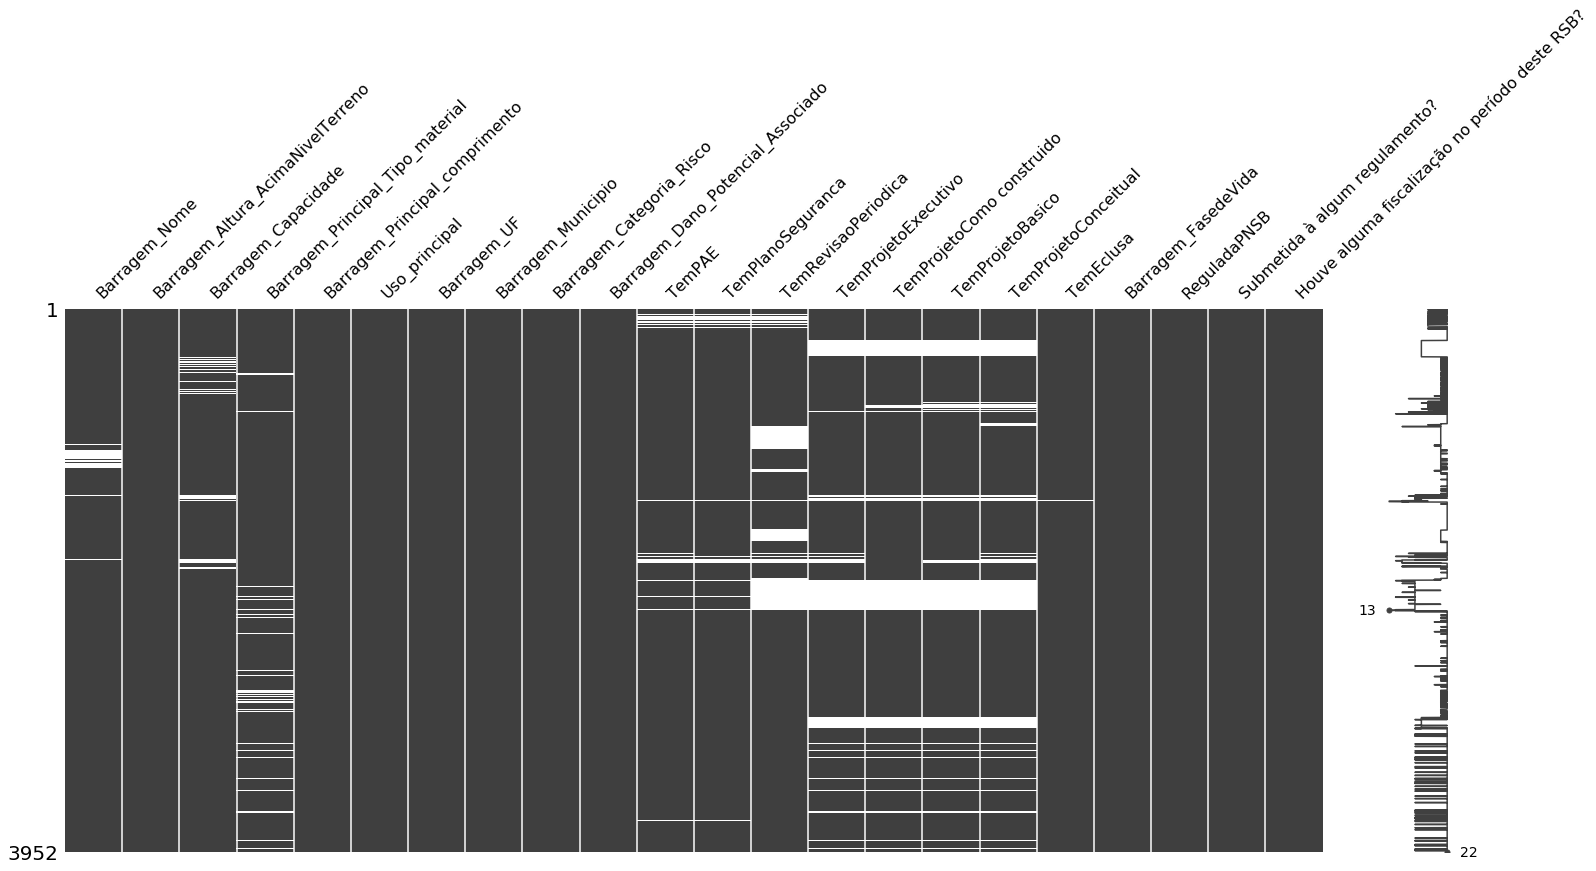

In [29]:
import missingno as msno
msno.matrix(df)

In [33]:
#check what is left:
mvp = df.dropna()
mvp # only 567 dams have every all the information filled.

,Barragem_Nome,Barragem_Altura_AcimaNivelTerreno,Barragem_Capacidade,Barragem_Principal_Tipo_material,Barragem_Principal_comprimento,Uso_principal,Barragem_UF,Barragem_Municipio,Barragem_Categoria_Risco,Barragem_Dano_Potencial_Associado,...,TemRevisaoPeriodica,TemProjetoExecutivo,TemProjetoComo construido,TemProjetoBasico,TemProjetoConceitual,TemEclusa,Barragem_FasedeVida,ReguladaPNSB,Submetida à algum regulamento?,Houve alguma fiscalização no período deste RSB?
239,Caldeirões,29.00,18.790,terra,296.84,irrigação,AL,Palmeira dos Índios,médio,alto,...,não,não,não,sim,não,não,operação,sim,Sim,Sim
240,Cocorobó,33.50,245.376,terra,1320.00,abastecimento humano,BA,Canudos/Euclides da Cunha,alto,alto,...,não,não,sim,não,não,não,operação,sim,Sim,Sim
241,Rio Paranã,33.00,170.000,terra,1760.00,irrigação,GO,Formosa e São João D’Aliança,médio,alto,...,não,sim,não,não,não,não,operação,sim,Sim,Sim
242,Berizal,41.00,339.390,terra,520.00,regularização de vazão,MG,Berizal e São João do Paraíso,não se aplica,alto,...,não,não,não,não,não,não,construção,sim,Sim,Não
243,Gasparino,23.33,48.608,concreto convencional,1074.34,abastecimento humano,BA,Coronel João Sá,médio,alto,...,não,não,não,sim,não,não,operação,sim,Sim,Sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17599,Xingó,27.00,3800.000,terra-enrocamento,1030.00,hidrelétrica,SE,Piranhas/AL-Nordeste; Canindé de São Francisco...,baixo,alto,...,não,não,sim,não,não,não,operação,sim,sim,Não
17600,Ypê,18.00,14.380,terra-enrocamento,591.50,hidrelétrica,GO,Santa Helena de Goiás/GO-Centro Oeste,baixo,alto,...,não,sim,não,sim,não,não,operação,sim,sim,Não
17601,Ypê,14.00,14.380,terra-enrocamento,531.50,hidrelétrica,GO,Santa Helena de Goiás/GO-Centro Oeste,baixo,médio,...,não,sim,não,sim,não,não,operação,sim,sim,Não
17602,Ypê,12.00,14.380,terra-enrocamento,183.50,hidrelétrica,GO,Santa Helena de Goiás/GO-Centro Oeste,baixo,médio,...,não,sim,não,sim,não,não,operação,sim,sim,Não


In [35]:
mvp.to_csv('mvp.csv',index=False)

In [31]:
#consider fill with means when possible.